In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [281]:
import pandas as pd
df = pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (10)\\spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [282]:
df.shape

(5572, 5)

In [283]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [284]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [285]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [286]:
df['message_category']=le.fit_transform(df['v1'])

In [287]:
df.head()

,v1,v2,message_category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [288]:
df.rename(columns={'v1':'category','v2':'message'},inplace=True)
df.drop('category',axis=1,inplace=True)

In [289]:
df.head(2)

,message,message_category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0


In [290]:
df.isnull().sum()

message             0
message_category    0
dtype: int64

In [291]:
spam_counts=df['message_category'].value_counts()

In [292]:
spam_counts

message_category
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='message_category'>

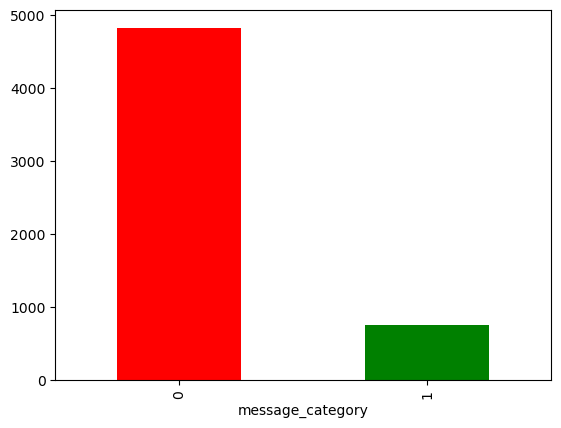

In [293]:
import matplotlib.pyplot as plt
spam_counts.plot(kind='bar',color=['red','green'])


In [294]:
df['message'].str.lower()
df.head()

,message,message_category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [295]:
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub('r',text)

In [296]:
df['message'].apply(remove_html_tags)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [297]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
df['message'].apply(remove_punctuation)


0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will Ì_ b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: message, Length: 5572, dtype: object

In [298]:
df.head(3)

,message,message_category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [299]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['message_category'])

In [300]:
y_train.shape

(4179,)

In [301]:
X_train.head()

2553                  ÌÏ give me some time to walk there.
2951                             Tell me whos this pls:-)
790     This is hoping you enjoyed your game yesterday...
1567                      whatever, im pretty pissed off.
3332    You are being contacted by our dating service ...
Name: message, dtype: object

In [302]:
X_train.isnull().sum()

0

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

In [304]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [305]:
X_test_tfidf = vectorizer.transform(X_test)

In [306]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [307]:
from sklearn.pipeline import Pipeline
rf_pipeline=ImbPipeline([
    ('smote',SMOTE(random_state=24)),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=1))
])

In [308]:
param_grid_rf = {
    'model__n_estimators': [50, 75, 100, 150],
    'model__max_depth': [None, 10, 20, 30]
}

In [309]:
grid_search = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)

In [310]:
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=24)),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__n_estimators': [50, 75, 100, 150]})

In [311]:
print("Best parameters : ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters :  {'model__max_depth': None, 'model__n_estimators': 75}
Best cross-validation score:  0.9664985817838009


In [312]:
y_pred = grid_search.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       1.00      0.80      0.89       186

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [313]:
from sklearn.svm import SVC
svm=SVC()

In [314]:
svm_pipeline=ImbPipeline([
    ('smote',SMOTE(random_state=24)),
    ('model',SVC(random_state=1))
])
param_grid_svm = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best cross-validation score:  0.9734378133684783


In [315]:
y_pred = grid_search.predict(X_test_tfidf)

In [316]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.97      0.95      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

